Successfully loaded RELI.csv
Training Model... (Please wait)

 FINAL RESULT FOR PPT
Model Accuracy: 99.40%


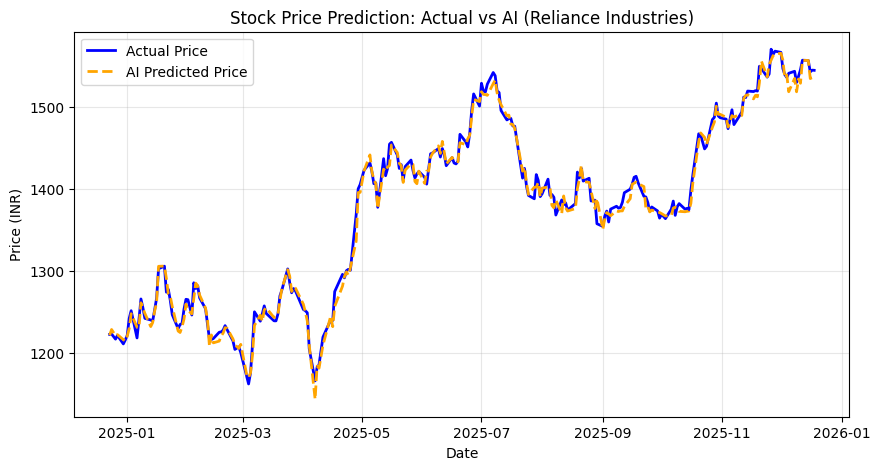

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re

# ---------------------------------------------------------
# STEP 1: LOAD DATA
# ---------------------------------------------------------
filename = 'RELI.csv'  # Matches your uploaded file

try:
    df = pd.read_csv(filename)
    print(f"Successfully loaded {filename}")
except:
    print("Error: 'RELI.csv' not found. Please upload the file to Colab first.")

# ---------------------------------------------------------
# STEP 2: DATA CLEANING (CUSTOMIZED FOR YOUR FILE)
# ---------------------------------------------------------
def clean_currency(x):
    """Removes commas and converts to float"""
    if isinstance(x, (int, float)): return x
    return float(str(x).replace(',', ''))

def clean_volume(x):
    """Converts '10.5M' to 10500000 and removes K/B suffixes"""
    x = str(x).upper().replace(',', '')
    if 'M' in x:
        return float(re.sub(r'[^0-9.]', '', x)) * 1_000_000
    elif 'K' in x:
        return float(re.sub(r'[^0-9.]', '', x)) * 1_000
    elif 'B' in x:
        return float(re.sub(r'[^0-9.]', '', x)) * 1_000_000_000
    try:
        return float(x)
    except:
        return 0.0

def clean_percent(x):
    """Removes % sign and converts to float"""
    if isinstance(x, (int, float)): return x
    return float(str(x).replace('%', ''))

# Apply cleaning to specific columns
df['Price'] = df['Price'].apply(clean_currency)
df['Open']  = df['Open'].apply(clean_currency)
df['High']  = df['High'].apply(clean_currency)
df['Low']   = df['Low'].apply(clean_currency)
df['Vol.']  = df['Vol.'].apply(clean_volume) # Note: Column name is 'Vol.'
df['Change %'] = df['Change %'].apply(clean_percent)

# Parse Dates (Format is DD-MM-YYYY)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date') # Sort Oldest to Newest

# ---------------------------------------------------------
# STEP 3: TRAIN MODEL
# ---------------------------------------------------------
# Features (Inputs) -> Target (Output)
X = df[['Open', 'High', 'Low', 'Vol.']]
y = df['Price']

# Split: 80% Training, 20% Testing
split = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]
test_dates = df['Date'].iloc[split:]

print("Training Model... (Please wait)")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ---------------------------------------------------------
# STEP 4: GET RESULTS
# ---------------------------------------------------------
preds = model.predict(X_test)
accuracy = r2_score(y_test, preds) * 100

print("\n" + "="*30)
print(f" FINAL RESULT FOR PPT")
print("="*30)
print(f"Model Accuracy: {accuracy:.2f}%")
print("="*30)

# ---------------------------------------------------------
# STEP 5: SAVE GRAPH
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test, label='Actual Price', color='blue', linewidth=2)
plt.plot(test_dates, preds, label='AI Predicted Price', color='orange', linestyle='--', linewidth=2)
plt.title('Stock Price Prediction: Actual vs AI (Reliance Industries)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('reliance_result.png')
plt.show()